In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Kernel Density Estimation

In [3]:
from sklearn.datasets import make_blobs
X ,y = make_blobs(n_features=1, n_samples=30, random_state=1)

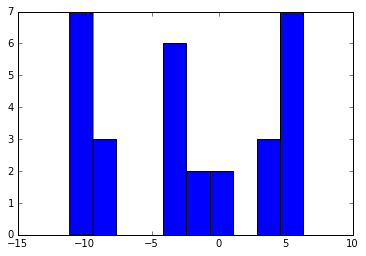

In [4]:
plt.hist(X);

([], <a list of 0 Text yticklabel objects>)

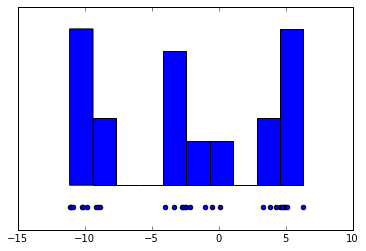

In [10]:
plt.hist(X);
plt.scatter(X.ravel(), -np.ones(len(X)))
plt.yticks(())

In [9]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(bandwidth=1).fit(X)

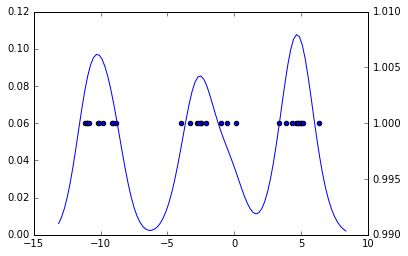

In [11]:
line = np.linspace(X.min() - 2, X.max()+2, 100)
line_scores = np.exp(kde.score_samples(line[:, np.newaxis]))
plt.plot(line, line_scores)
plt.twinx().scatter(X.ravel(), np.ones(len(X)))

In [17]:
kde.score(X)

-76.629134558476792

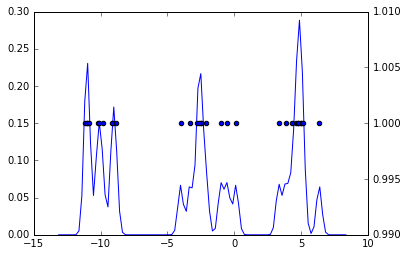

In [18]:
kde = KernelDensity(bandwidth=0.2).fit(X)
line = np.linspace(X.min() - 2, X.max()+2, 100)
line_scores = np.exp(kde.score_samples(line[:, np.newaxis]))
plt.plot(line, line_scores)
plt.twinx().scatter(X.ravel(), np.ones(len(X)))

In [20]:
kde.score(X)

-58.82182506800099

In [21]:
from sklearn.grid_search import GridSearchCV
param_grid = {'bandwidth': np.logspace(-1,1,20)}
grid = GridSearchCV(KernelDensity(), param_grid, cv=10)
grid.fit(X)

GridSearchCV(cv=10, error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bandwidth': array([  0.1    ,   0.12743,   0.16238,   0.20691,   0.26367,   0.33598,
         0.42813,   0.54556,   0.69519,   0.88587,   1.12884,   1.43845,
         1.83298,   2.33572,   2.97635,   3.79269,   4.83293,   6.15848,
         7.8476 ,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [22]:
grid.best_params_

{'bandwidth': 0.69519279617756058}

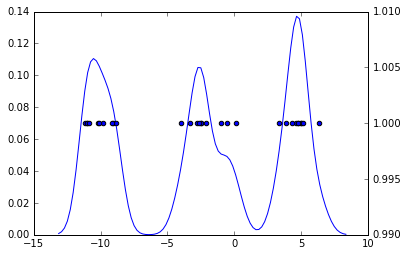

In [23]:
line_scores = np.exp(grid.best_estimator_.score_samples(line[:, np.newaxis]))
plt.plot(line, line_scores)
plt.twinx().scatter(X.ravel(), np.ones(len(X)))

## PCA as probabilistic model

In [24]:
from sklearn.datasets import make_low_rank_matrix
from sklearn.decomposition import PCA

X = make_low_rank_matrix(n_features=100, effective_rank=10, random_state=0)

In [25]:
pca = PCA(n_components=20).fit(X)
pca.score(X)

196.03616073526103

In [26]:
pca = PCA(n_components=50).fit(X)
pca.score(X)

199.36886402802705

In [28]:
from sklearn.learning_curve import validation_curve
param_range = list(range(2,40,2))
training_scores, validation_scores = validation_curve(PCA(), X, None, param_name="n_components",\
                                                     param_range=param_range)

In [32]:
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc="best")

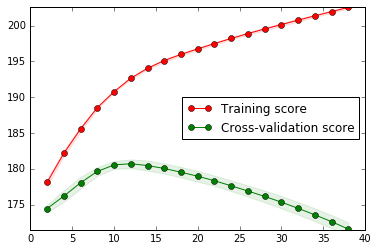

In [33]:
plot_validation_curve(param_range, training_scores,validation_scores)